# Data Exploration
Flights Data Exploration Challenge\
Learned with Microsoft at https://github.com/MicrosoftDocs/ml-basics/blob/master/01%20-%20Data%20Exploration.ipynb

### 01 - Importing the data and Viewing it

#### 01.01 - Download the data

In [1]:
import requests

url = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv"

response = requests.get(url)

file_name = "flights.csv"

with open(file_name, "wb") as f:
    f.write(response.content)

#### 01.02 - View the data

In [180]:
import pandas as pd

df = pd.read_csv("flights.csv")

df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### 02 - Cleaning the Data

#### 02.01 - Handling Null values

In [181]:
# Create a dataframe to show the data type of each label as well as the number and percentage of Null values

original = df.shape # store original data size

num_records = df.shape[0]

na_table = []
for col in df.columns:
    na_vals = df[col].isna().sum()
    na_table.append([col, df[col].dtype, na_vals, round (na_vals / num_records * 100, 2)])

na_table = pd.DataFrame(na_table, columns = ["Label", "Data Type", "No. of Null Vals", "Percentage of Null vals"])
display(na_table)

,Label,Data Type,No. of Null Vals,Percentage of Null vals
0,Year,int64,0,0.00
1,Month,int64,0,0.00
2,DayofMonth,int64,0,0.00
3,DayOfWeek,int64,0,0.00
4,Carrier,object,0,0.00
5,OriginAirportID,int64,0,0.00
6,OriginAirportName,object,0,0.00
7,OriginCity,object,0,0.00
8,OriginState,object,0,0.00
9,DestAirportID,int64,0,0.00


In [182]:
# 1.02% of the label "DepDela15" are na values.
# According to the challenge description, DepDel15 is meant to be a binary value that represents if departure was delayed by more than 15 mins.
# Let us investigate these NaN values

df_na = df.loc[df["DepDel15"].isna()]
df_na.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1


In [183]:
print("Number of flights with NaN values for DepDel15: ", df_na.shape[0])
print("\nNumber of cancelled flights with NaN values for DepDel15: ", df_na["Cancelled"].sum())

print(f"""--Total delay time for all flights with NaN values for DepDel15-- 
      Total Departure Delay: {df_na["DepDelay"].sum()}
      Total Arrival Delay: {df_na["ArrDelay"].sum()}\n""")

print(f"""Total no of flights with arrival delayed by more than 15 minutes: {df_na["ArrDel15"].sum()}""")
print("Number of cancelled flights in total: ", df["Cancelled"].sum())


Number of flights with NaN values for DepDel15:  2761

Number of cancelled flights with NaN values for DepDel15:  2761
--Total delay time for all flights with NaN values for DepDel15-- 
      Total Departure Delay: 0
      Total Arrival Delay: 0

Total no of flights with arrival delayed by more than 15 minutes: 2761
Number of cancelled flights in total:  2916


Upon close inspection it seems that these NaN cases occur when the flight is cancelled. As such it's departure being delayed is just reflected by "NaN" and it's arrival is indefinitely delayed. What's interesting is the ArrDel15 label captures the indefinite arrival delay but not the ArrDelay lable doesn't. 

However, not all cancelled flights result in this NaN. more investigation required

In [184]:
df_cf = df.loc[df["Cancelled"] == 1] #cancelled flights
df_cf_wd = df_cf.loc[df_cf["DepDelay"] != 0] #delayed flights

print(f"""Cancelled flights without NaN for DepDel15: {df_cf.shape[0] - df_cf.loc[df_cf["DepDel15"].isna()].shape[0]}""")
print(f"""Cancelled flights that were initially delayed for departure by a non zero amount: {df_cf_wd.shape[0]}""")

df_inv1 = df_cf.dropna()
df_inv2 = df_cf[df_cf["DepDelay"] != 0]

print("""\nBelow represents the 6 records diff, they are flights with zero departure 
delay and are cancelled but DepDel15 is not NaN, serving as outliers to reasoning for NaN values in DepDel15""")
df_inv1[~df_inv1.isin(df_inv2)].dropna()

Cancelled flights without NaN for DepDel15: 155
Cancelled flights that were initially delayed for departure by a non zero amount: 149

Below represents the 6 records diff, they are flights with zero departure 
delay and are cancelled but DepDel15 is not NaN, serving as outliers to reasoning for NaN values in DepDel15


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
27180,2013.0,7.0,20.0,6.0,AA,12478.0,John F. Kennedy International,New York,NY,13303.0,Miami International,Miami,FL,1505.0,0.0,0.0,1835.0,0.0,1.0,1.0
91439,2013.0,6.0,24.0,1.0,YV,11057.0,Charlotte Douglas International,Charlotte,NC,12953.0,LaGuardia,New York,NY,1500.0,0.0,0.0,1649.0,0.0,1.0,1.0
91636,2013.0,10.0,16.0,3.0,MQ,11298.0,Dallas/Fort Worth International,Dallas/Fort Worth,TX,12191.0,William P Hobby,Houston,TX,655.0,0.0,0.0,800.0,0.0,1.0,1.0
104137,2013.0,10.0,11.0,5.0,WN,14057.0,Portland International,Portland,OR,14893.0,Sacramento International,Sacramento,CA,1030.0,0.0,0.0,1155.0,0.0,1.0,1.0
108443,2013.0,6.0,13.0,4.0,US,14107.0,Phoenix Sky Harbor International,Phoenix,AZ,10721.0,Logan International,Boston,MA,853.0,0.0,0.0,1701.0,0.0,1.0,1.0
110044,2013.0,6.0,23.0,7.0,F9,14679.0,San Diego International,San Diego,CA,11292.0,Denver International,Denver,CO,625.0,0.0,0.0,942.0,0.0,1.0,1.0


So there are 2916 cancelled flights\
149 of which where delayed by a non-zero amount\
2761 of which are delayed by zero time and having NaN for the label "DepDel15" (All NaN values are from this)\
6 of which are delayed by zero time and having 0 for the label "DepDel15"

The questions now is how should we handle the values of DepDel15 for all the 2761 NaN entries?

Reasoning
* If the flight was cancelled with 0 Departure delay, then it was precancelled and customers did not have to wait. DepDelay and ArrDelay should be 0.
* Since these flights were meant to occur but customers never waited for them as they were informed of cancellation ahead of time, they (the flights) should be treated specially
* They should not be included as part of flights that determine metrics for delay analysis (As they were precancelled)
* So they should be removed from the data set for such analysis (They will give false readings of a perfect flight - no delay flights)
* However, special analysis can be conducted on such pre-cancelled flights

Further Reasoning
* We would want to remove all cancelled flights for further analysis as having flights with Departure delays but no arrival delays will also skew results of actual flights
* Special analysis of cancelled flights can and should be conducted separately


In [185]:
df_pcf = df.loc[(df["Cancelled"] == 1) & (df["DepDelay"] == 0)] # Data of only precancelled flights
df_no_pcf = df[~df.isin(df_pcf)].dropna() # Data with no precancelled flights
df_can = df.loc[df["Cancelled"] == 1] # Data of cancelled flights
df_clean = df.loc[df["Cancelled"] == 0]

cleaned_for_null_vals = df_clean.shape

print(f"""We will work with {df_clean.shape[0]} records out of {df_clean.shape[1]} for further analytics on flight delays\nThe {df.shape[0] - df_no_pcf.shape[0]} records removed will be used for special analysis on cancelled flights""")
print(df.shape, df_clean.shape, df_can.shape)

We will work with 269024 records out of 20 for further analytics on flight delays
The 2767 records removed will be used for special analysis on cancelled flights
(271940, 20) (269024, 20) (2916, 20)


#### 02.02 - Handling Outliers

In [186]:
# Let us create a function to remove outliers within a certain threshold z-score

def remove_outliers(df, col, threshold):
    """
    Removes outliers from a dataframe (df) by accessing a column (col)
    and ensuring that all values are within a threshold z-score provided
    """

    # Store initial shape of dataframe
    original = df.shape

    # Remove outiers
    mean = df[col].mean()
    std = df[col].std()
    
    upper_limit = mean + threshold * std
    lower_limit = mean - threshold * std
    
    df = df.loc[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

    # Compare initial and final shapes
    final = df.shape

    print(f"""{original[0]} original records, {original[0] - final[0]} removed, {final[0]} remain""")
    
    return df

In [187]:
# let us not attempt to further clean the data by removing outliers for depdelay and arrdelay

df_clean = remove_outliers(df_clean, "DepDelay", 3)
df_clean = remove_outliers(df_clean, "ArrDelay", 3)

269024 original records, 5888 removed, 263136 remain
263136 original records, 6418 removed, 256718 remain


In [188]:
# Data cleaning summary

cleaned_for_outliers = df_clean.shape
print (f"""{original[0]} records in original data""")
print (f"""{original[0] - cleaned_for_null_vals[0]} or {round((original[0] - cleaned_for_null_vals[0]) / original[0] * 100 , 2)}% records removed after cleaning for null values: {cleaned_for_null_vals[0]} or {round((cleaned_for_null_vals[0]) / original[0] * 100 , 2)}% remain""")
print (f"""{original[0] - cleaned_for_outliers[0]} or {round((original[0] - cleaned_for_outliers[0]) / original[0] * 100 , 2)}% records removed after cleaning for outliers: {cleaned_for_outliers[0]} or {round((cleaned_for_outliers[0]) / original[0] * 100 , 2)}% remain""")

271940 records in original data
2916 or 1.07% records removed after cleaning for null values: 269024 or 98.93% remain
15222 or 5.6% records removed after cleaning for outliers: 256718 or 94.4% remain


### 03 - Exploratory Data Analysis

#### 03.01 - Building helper functions

In [189]:
# Let's build functions to generate a heat map, box plot, bar chart, or scatter plot of variables
# We will use these functions to carry out exploratory data analysis efficiently

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

def scatter(var1, var2, width = 10, height = 6):
    """
    Generates a scatter plot of two quantitative variables (var1 and var2)
    """

    # Check that series is one dimensional and of the same shape
    if len(var1.shape) != 1 or len(var1.shape) != 1:
        raise ValueError("Series must be one dimensional") 
    elif var1.shape[0] != var2.shape[0]:
        raise ValueError("The two series must have the same shape")
    
    # plot the scatter diagram
    plt.figure(figsize = (width, height))
    plt.scatter(var1, var2)
    plt.xlabel(var1.name)
    plt.ylabel(var2.name)
    plt.title(f"""Scatter plot of {var1.name} and {var2.name}""")
    plt.show()

def simple_bar(var, width = 10, height = 6, bar_width = 0.8):
    """
    Generates a bar chart of a single categorical variable (var)
    """
    # create frequency map of the categorical variable and store the index and values in x and y
    freq_map = var.value_counts()
    x = freq_map.index.tolist()
    y = freq_map.tolist()

    # plot the bar chart
    plt.figure(figsize = (width, height))
    plt.bar(x, y, bar_width, align = "center")
    plt.xticks(x, rotation = 45)
    plt.title(f"""Bar plot of {var.name}""")
    plt.show()

def heat(df, width = 10, height = 6):
    """
    Generates a heat map of a dataframe of quantitative variables (var_list)
    """
    # Generate correlation matrix
    corr_matrix = df.corr()

    plt.figure(figsize = (width, height))
    sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1)
    plt.title(f"""Heat map""")
    plt.show()

def box(vars, df = None, width = 4, height = 8, vert = False, together = False, grid = False, series = False, labels = None, title = None, rotation = None):
    """
    Generates a box plot of a sequence of variables vars of a dataframe df
    """
    
    # if series is True then vars is a list of pandas series else it is a list of column names
    if series == True:
        # Store label names of all pandas series if labels don't exist
        if labels == None:
            labels = []
            for col in vars:
                labels.append(col.name)

        # Plot the box plot of all series with appropriate labels
        plt.figure(figsize = (width, height))
        plt.boxplot(vars, vert = vert, labels = labels, showmeans = True)
        plt.grid(grid, axis = "y")

        if title != None:
            plt.title(title)

        if rotation != None:
            plt.xticks(labels, labels, rotation = rotation)
        
        plt.show()
        return 
    
    # If together is True, plot all box plots in one figure
    if together == True:
        plt.figure(figsize = (width, height))
        plt.boxplot(df[vars], vert = vert, labels = vars, showmeans = True)
        plt.grid(grid, axis = "y")

        if title != None:
            plt.title(title)

        if rotation != None:
            plt.xticks(labels, labels, rotation = rotation)
        
        plt.show()

    # If together is not true, plot all box plots in separate figures
    else:
        for col in vars:
            plt.figure(figsize = (width, height))
            plt.boxplot(df[col], vert = vert, labels = [col], showmeans = True)
            plt.grid(grid, axis = "y")

            if title != None:
                plt.title(title)

            if rotation != None:
                plt.xticks(labels, labels, rotation = rotation)
            
            plt.show()

def distribution(var, width = 10, height = 6, name = None):
    """
    This function generates a distribution histogram for a pandas series "var"
    """

    if name == None:
        name = var.name

    # Set the figure base and plot the histogram
    plt.hist(var, bins = 30, color = "blue", label = f"{name} Histogram", density = True)
    plt.legend()
    plt.show()

    print(f"{name}'s Mean              : {round(var.mean(), 2)}")
    print(f"{name}'s Median            : {round(var.median(), 2)}")
    print(f"{name}'s Standard deviation: {round(var.std(), 2)}")

def decomposed_box(df, main_series, set_of_series, width = 10, height = 6, rotation = None):
    """
    Generates a box plot of each series in the set_of_series but each series' box plot is 
    seperated into multiple box plots corresponding to different categories in the main series 
    """
    # Determine the unique categories in the main series
    break_down = df[main_series].value_counts()
    print(break_down)
    cats = break_down.index.tolist()

    # For each set of series, create a list of series categorised based on the main series
    source_data = []
    for series in set_of_series:
        data = []
        for cat in cats:
            data.append(df.loc[df[main_series] == cat][series])
        source_data.append(data)
    
    # source_data now contains a list for each of the series in set_of_series
    # each list has a list containing the data for each category
    # Now plot the box plot for each category and each series

    i = 0
    for series in source_data:
        box(series, df = df, width = width, height = height, grid = True, series = True, together = True, vert = True, labels = cats, title = set_of_series[i], rotation = rotation)
        plt.show()
        i += 1

def decomposed_bar(main_series, set_of_series, width = 10, height = 6):
    """
    Generates a bar chart of each series in the set_of_series but each series' bar chart is
    seperated into multiple bar charts corresponding to different categories in the main series
    """
    pass
    

#### 03.02 - Summary Statistics of Numeric Fields

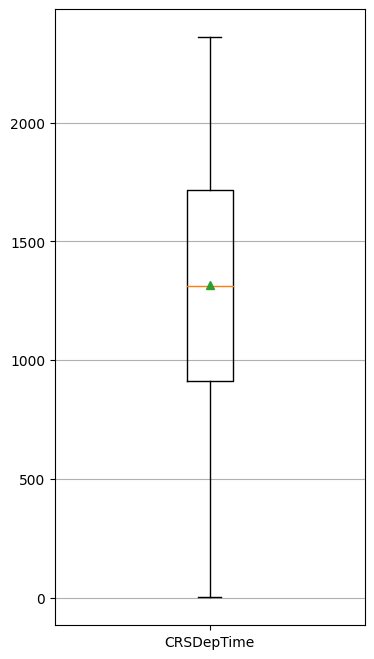

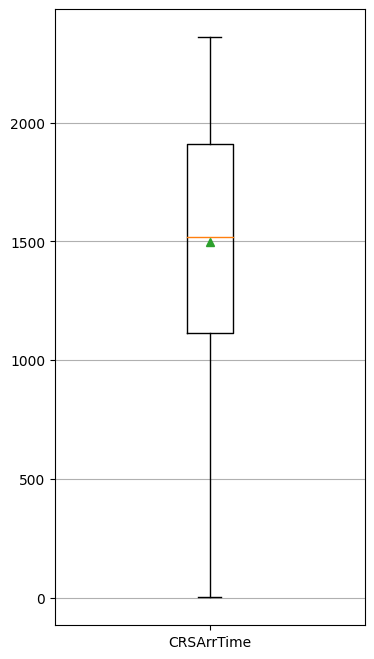

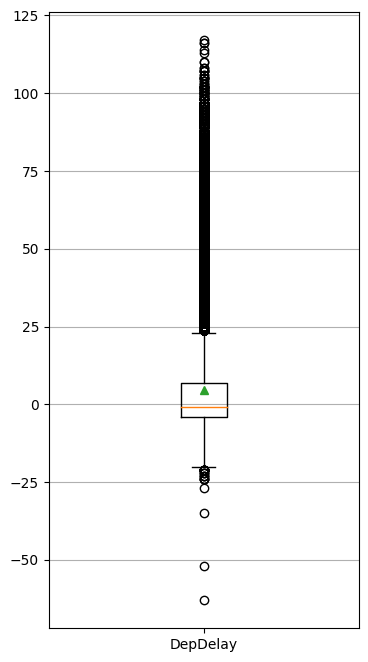

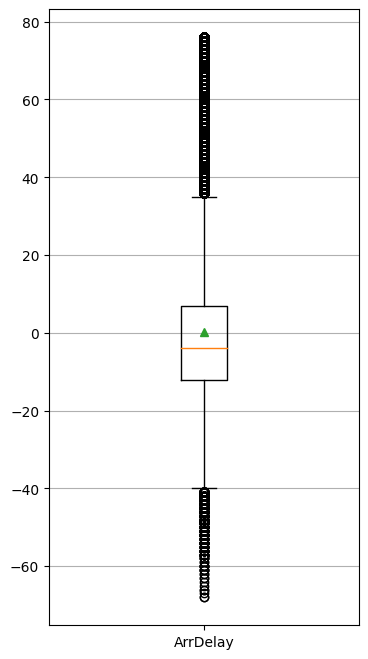

In [190]:
# View summary statistics for the numeric fields in the dataset

numeric = ["CRSDepTime", "CRSArrTime", "DepDelay", "ArrDelay"]
box(numeric, df = df_clean, vert = True, grid = True)

#### 03.03 - Distribution of departure delay and arrival delay

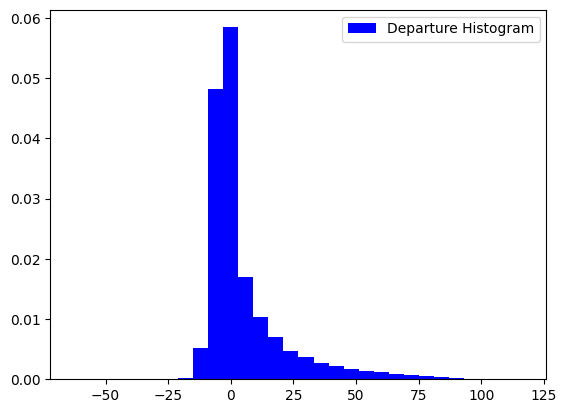

Departure's Mean              : 4.54
Departure's Median            : -1.0
Departure's Standard deviation: 16.16


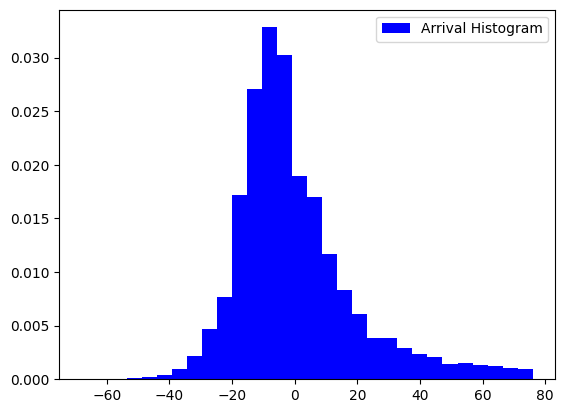

Arrival's Mean              : 0.19
Arrival's Median            : -4.0
Arrival's Standard deviation: 19.25


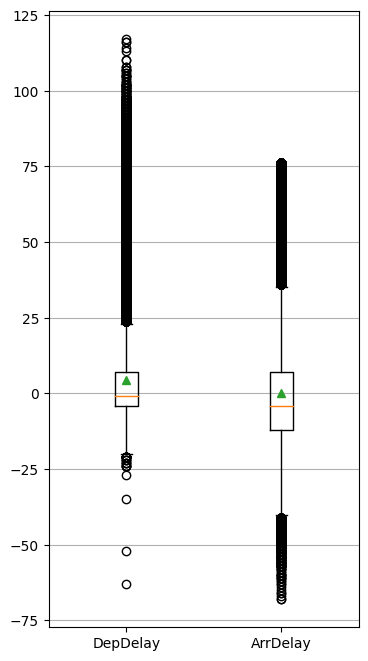

In [191]:
distribution(df_clean["DepDelay"], name = "Departure")
distribution(df_clean["ArrDelay"], name = "Arrival")
box([df_clean["DepDelay"], df_clean["ArrDelay"]], series = True, grid = True, vert = True)

Departure delays are centered around 3 mins. It's distribution is skewed towards the left while the arrival delays are more centered around -4 mins (meaning they actually arrive early). However, arrival delays are more normal and spread out than departure delays. Meaning there is a higher chance that one arrives at a value deviated from -4 mins than departs at a value deviated from 3 mins. 

#### 03.04 - Carrier Performance

Carrier
WN    55539
DL    37052
AA    27173
UA    26967
US    22649
OO    15219
EV    14276
B6    11438
MQ    10251
FL     8906
9E     7287
AS     6639
YV     4839
F9     3361
VX     3267
HA     1855
Name: count, dtype: int64


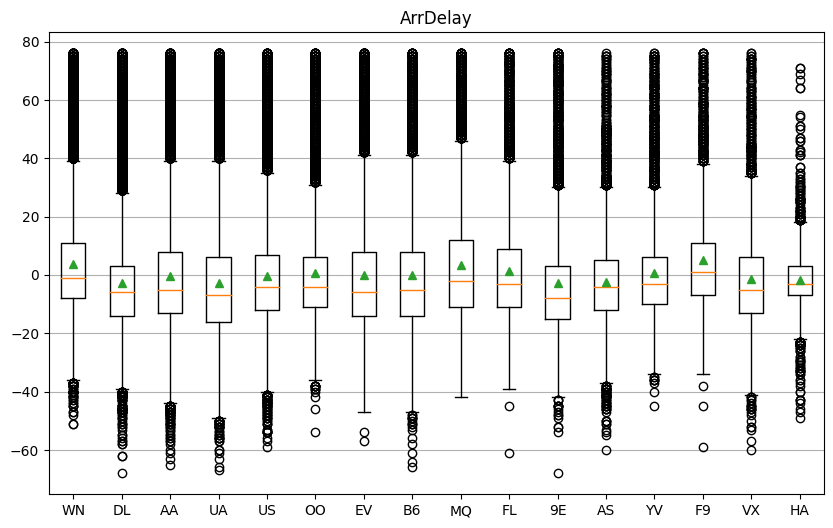

In [192]:
decomposed_box(df_clean, "Carrier", ["ArrDelay"])

Carriers DL, AA, UA, US, EV, B6, 9E, AS, VX and HA seem to averagely arrive earlier than scheduled. However, HA carrier seems to be consistent in this than others. Although, HA has the least number of flights. 

In [193]:
cats = df_clean["Carrier"].value_counts().index.tolist()
print(cats)

['WN', 'DL', 'AA', 'UA', 'US', 'OO', 'EV', 'B6', 'MQ', 'FL', '9E', 'AS', 'YV', 'F9', 'VX', 'HA']


#### 03.05 - Weekday and Weekend performance

DayOfWeek
1    38745
3    38276
2    38043
4    37627
5    37505
7    35958
6    30564
Name: count, dtype: int64


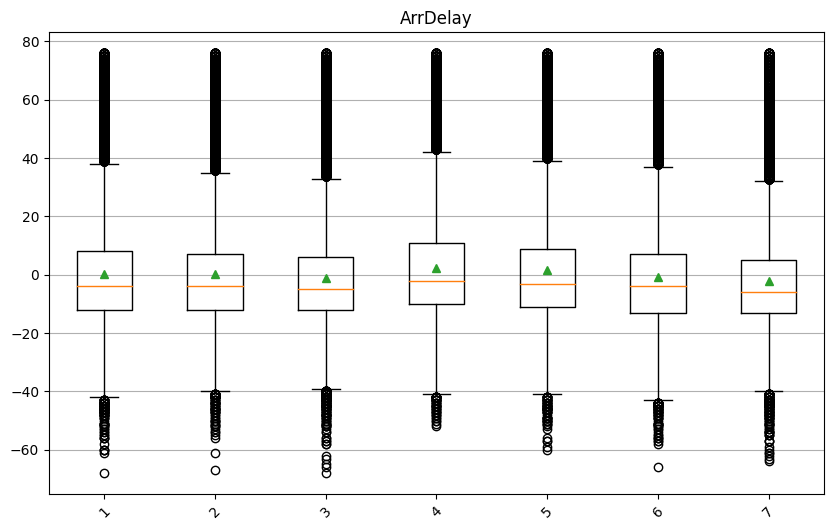

In [194]:
decomposed_box(df_clean, "DayOfWeek", ["ArrDelay"], rotation = 45)

There isn't any large difference in performance across weekdays, however, wednesdays seem to slightly later in arrival and sundays seem to slightly earlier. 

#### 03.06 - Airport Performance

In [195]:
# Check whether OriginAirportName is also a unique identifier
ids = df_clean["OriginAirportID"].value_counts()
names = df_clean["OriginAirportName"].value_counts()

if ids.tolist() == names.tolist():
    print("Airport Name is also a Unique ID")
else:
    print("Airport Name and ID needs to merged to map Airport ID to Name post analysis")

Airport Name is also a Unique ID


OriginAirportID
10397    14390
13930    11698
12892    11222
11298     9722
11292     9125
         ...  
13931      999
14027      969
14307      909
12954      807
10299      739
Name: count, Length: 70, dtype: int64


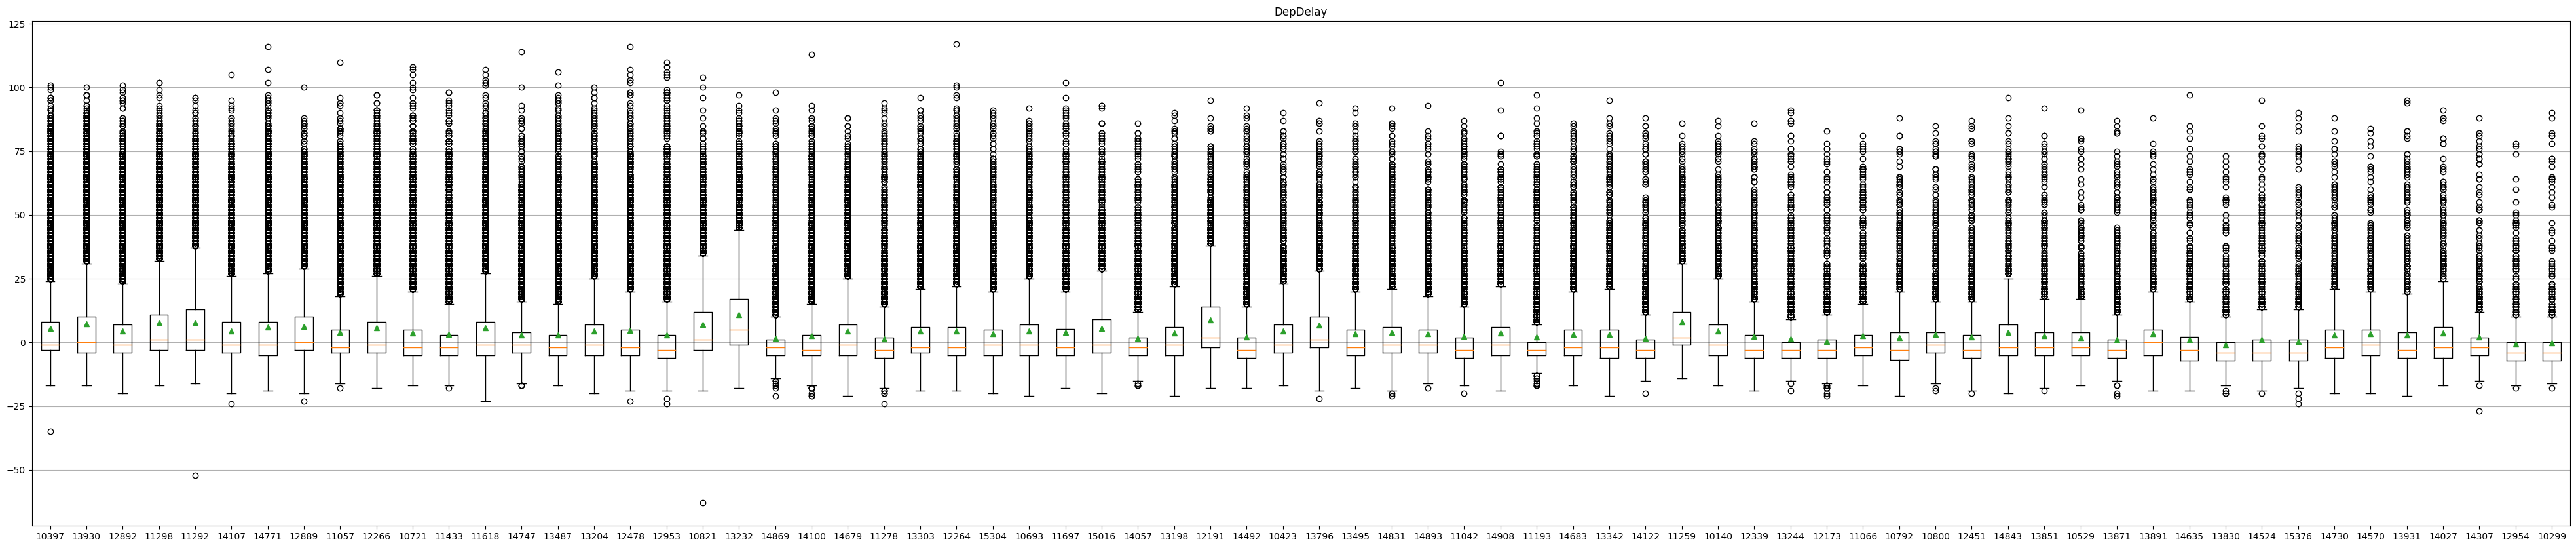

In [196]:
#Visualize the distribution of Departure delays for each airport
decomposed_box(df_clean, "OriginAirportID", ["DepDelay"], width = 50, height = 10)

In [197]:
# Create list of airports and their number of flights 
airport_delays = []
airport_delays.append(names.index.tolist())
airport_delays.append(ids.index.tolist())
airport_delays.append(names.tolist())

# Calculate average of departure delays for each airport in list above and append it to the list
averages = []
for airport in names.index.tolist():
    averages.append(round(df_clean[df_clean["OriginAirportName"] == airport]["DepDelay"].mean(), 2))
airport_delays.append(averages)

# Create and display dataframe of origin airport delays
airport_delays = pd.DataFrame(np.transpose(np.array(airport_delays)), columns = ["OriginAirportName", "OriginAirportID", "No_of_Flights", "AverageDepDelay"])
display(airport_delays)

,OriginAirportName,OriginAirportID,No_of_Flights,AverageDepDelay
0,Hartsfield-Jackson Atlanta International,10397,14390,5.56
1,Chicago O'Hare International,13930,11698,7.23
2,Los Angeles International,12892,11222,4.55
3,Dallas/Fort Worth International,11298,9722,7.78
4,Denver International,11292,9125,7.73
...,...,...,...,...
65,Norfolk International,13931,999,2.87
66,Palm Beach International,14027,969,3.73
67,Theodore Francis Green State,14307,909,2.14
68,Long Beach Airport,12954,807,-0.67


In [198]:
# Sort by Average Departure delay and display dataframe again

airport_delays = airport_delays.sort_values("AverageDepDelay")
display(airport_delays)

,OriginAirportName,OriginAirportID,No_of_Flights,AverageDepDelay
69,Ted Stevens Anchorage International,10299,739,-0.22
68,Long Beach Airport,12954,807,-0.67
60,Kahului Airport,13830,1122,-0.91
49,Honolulu International,12173,1688,0.21
62,Tucson International,15376,1073,0.23
...,...,...,...,...
1,Chicago O'Hare International,13930,11698,7.23
4,Denver International,11292,9125,7.73
3,Dallas/Fort Worth International,11298,9722,7.78
45,Dallas Love Field,11259,1898,8.07


William P Hobby has the highest Departure Delay and Tes Stevens Anchorage International has the lowest Departure delay but also the least number of flights.

#### 03.07 - late Departures delay and Arrival delay correlation

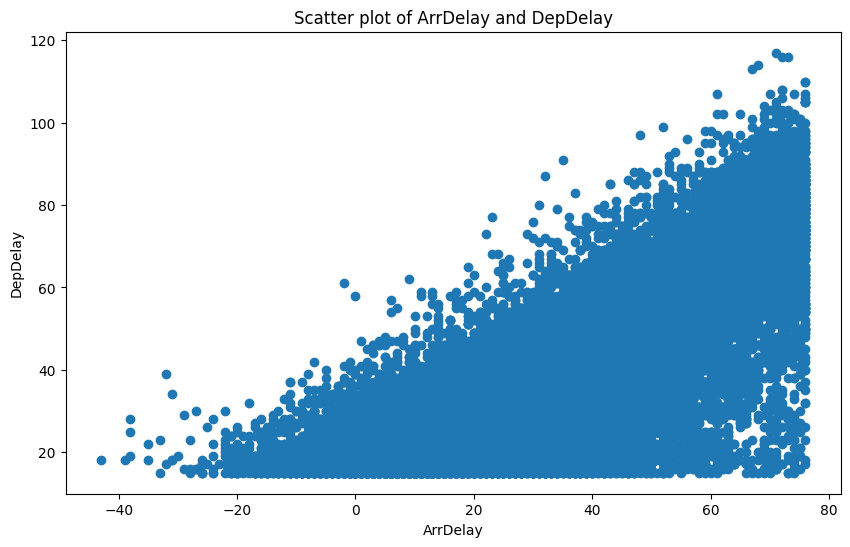

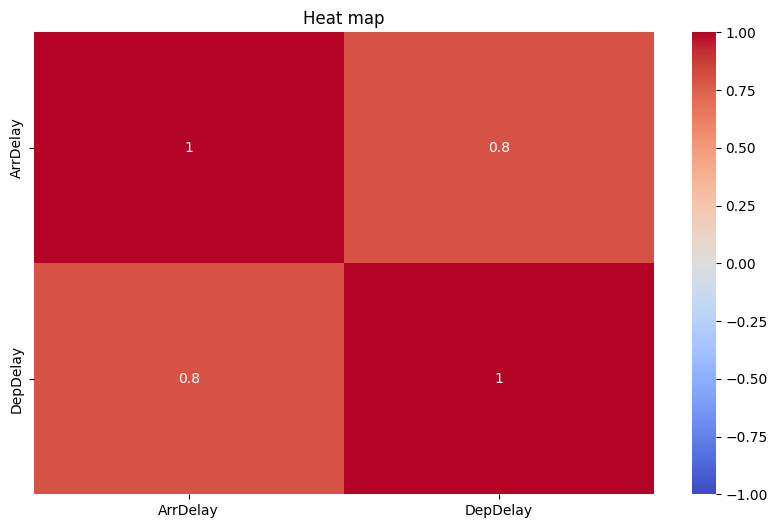

(256718, 20)

In [199]:
df_late_dep = df_clean[df_clean["DepDel15"] == 1]
scatter(df_late_dep["ArrDelay"], df_late_dep["DepDelay"])
heat(df_late_dep[["ArrDelay", "DepDelay"]])
df_clean.shape

Late departures do lead to a late arrival time

#### 03.08 - Route Performance

In [200]:
# Check if DestAirportName is also a unique identifier like DestAirportID
ids = df_clean["DestAirportID"].value_counts()
names = df_clean["DestAirportName"].value_counts()

if ids.tolist() == names.tolist():
    print("DestAirportName is also a unique identifier of Destination airports")
else:
    print("DestAirportName is not a unique identifier of Destination airports\
          There is a need to join ID and Airport Name to map IDs to Names")

DestAirportName is also a unique identifier of Destination airports


In [201]:
# Create new column that combines origin and destination as a route
df_clean["RouteID"] = df_clean["OriginAirportID"].astype(str) + "->" + df_clean["DestAirportID"].astype(str)
df_clean["RouteName"] = df_clean["OriginAirportName"] + "->" + df_clean["DestAirportName"]



In [202]:
# Create a route data list containing Route IDs, Route Names, No. of flights through a route, 
# No. of late arrivals through a route, and average arrival delay of a route

ids = df_clean["RouteID"].value_counts()
names = df_clean["RouteName"].value_counts()

route_ids = ids.index.tolist()
route_names = names.index.tolist()
flights_through_route = names.tolist()


In [203]:
# Count late arrivals for each route and Calculate average arrival delay for each route

route_late_arrivals = []
route_average_arrival_delay = []

for route in route_ids:
    route_late_arrivals.append(df_clean[df_clean["RouteID"] == route]["ArrDel15"].sum())
    route_average_arrival_delay.append(round(df_clean[df_clean["RouteID"] == route]["ArrDelay"].mean(), 2))

route_data = [route_ids, route_names, flights_through_route, route_late_arrivals, route_average_arrival_delay]

In [204]:
# Convert created route data list to table and display it
route_data = np.transpose(np.array(route_data))
route_data = pd.DataFrame(route_data, columns = ["RouteID", "RouteName", "FlightsThroughRoute", "LateArrivals", "RouteAverageArrivalDelay"])
display(route_data)

,RouteID,RouteName,FlightsThroughRoute,LateArrivals,RouteAverageArrivalDelay
0,14771->12892,San Francisco International->Los Angeles Inter...,873,170,2.39
1,12892->14771,Los Angeles International->San Francisco Inter...,791,183,4.16
2,13830->12173,Kahului Airport->Honolulu International,671,67,2.37
3,12173->13830,Honolulu International->Kahului Airport,668,48,0.82
4,12889->12892,McCarran International->Los Angeles International,667,119,1.72
...,...,...,...,...,...
2478,14122->14492,Pittsburgh International->Raleigh-Durham Inter...,1,1,63.0
2479,11042->14027,Cleveland-Hopkins International->Palm Beach In...,1,1,18.0
2480,13830->10299,Kahului Airport->Ted Stevens Anchorage Interna...,1,0,-16.0
2481,10721->11066,Logan International->Port Columbus International,1,0,-17.0


In [205]:
# Sort table according late arrivals and display 
print("Sorting by Late aarrivals")
route_data = route_data.sort_values("LateArrivals")
display(route_data)

# Sort table according to average arrival delay and display
print("Sorting by Route Average Delay")
route_data = route_data.sort_values("RouteAverageArrivalDelay")
display(route_data)

Sorting by Late aarrivals


,RouteID,RouteName,FlightsThroughRoute,LateArrivals,RouteAverageArrivalDelay
2482,11193->14107,Cincinnati/Northern Kentucky International->Ph...,1,0,2.0
2277,11042->11278,Cleveland-Hopkins International->Ronald Reagan...,15,0,-11.27
2278,12451->12889,Jacksonville International->McCarran Internati...,15,0,-7.67
2283,14492->12339,Raleigh-Durham International->Indianapolis Int...,15,0,-11.0
2302,12173->11292,Honolulu International->Denver International,14,0,-8.57
...,...,...,...,...,...
28,11292->14107,Denver International->Phoenix Sky Harbor Inter...,465,96,3.68
7,12892->12478,Los Angeles International->John F. Kennedy Int...,570,97,-2.98
39,11292->14869,Denver International->Salt Lake City Internati...,438,97,5.7
31,11292->12892,Denver International->Los Angeles International,454,98,2.95


Sorting by Route Average Delay


,RouteID,RouteName,FlightsThroughRoute,LateArrivals,RouteAverageArrivalDelay
272,13198->10397,Kansas City International->Hartsfield-Jackson ...,223,29,-0.0
21,13930->12953,Chicago O'Hare International->LaGuardia,482,99,-0.01
1155,14100->14122,Philadelphia International->Pittsburgh Interna...,76,10,-0.01
1647,14869->13204,Salt Lake City International->Orlando Internat...,43,6,-0.02
572,11298->15016,Dallas/Fort Worth International->Lambert-St. L...,149,18,-0.03
...,...,...,...,...,...
2280,10140->13204,Albuquerque International Sunport->Orlando Int...,15,5,9.8
1609,10140->13232,Albuquerque International Sunport->Chicago Mid...,45,15,9.84
2107,11278->10529,Ronald Reagan Washington National->Bradley Int...,21,8,9.86
2227,13198->11697,Kansas City International->Fort Lauderdale-Hol...,17,6,9.88


* Route with highest late arrivals is (Chicago O'Hare International -> LaGuardia)	
* Route with highest Average Arrival delay is (William P Hobby -> Raleigh-Durham International)	

### 04 - Further Improvements

For improvement of code, consider 
* Using an aggregate function for the generation of average or summary tables for categories
* Performing special analysis on cancelled flights